In [0]:
from IPython.display import display,HTML
def dhtml(str):
    display(HTML("""<style>
    @import url('https://fonts.googleapis.com/css?family=Ewert&effect=3d');      
    </style><h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e'>
    %s</h1>"""%str))

In [0]:
dhtml('Code Modules & Helpful Functions')

In [0]:
import numpy as np,pylab as pl,pandas as pd
import sys,h5py,urllib,zipfile
import tensorflow as tf
import tensorflow_hub as th
from sklearn.model_selection import train_test_split

In [0]:
fpath='https://olgabelitskaya.github.io/'
fw='weights.best.hdf5'
def prepro(x_train,y_train,x_test,y_test,n_class):
    n=int(len(x_test)/2)    
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    cy_train=tf.keras.utils.to_categorical(y_train,n_class) 
    cy_valid=tf.keras.utils.to_categorical(y_valid,n_class)
    cy_test=tf.keras.utils.to_categorical(y_test,n_class)
    df=pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
                     [y_train.shape,y_valid.shape,y_test.shape],
                     [cy_train.shape,cy_valid.shape,cy_test.shape]],
                    columns=['train','valid','test'],
                    index=['images','labels','encoded labels'])
    display(df)
    return [[x_train,x_valid,x_test],
            [y_train,y_valid,y_test],
            [cy_train,cy_valid,cy_test]]
def cb(fw):
    early_stopping=tf.keras.callbacks\
    .EarlyStopping(monitor='val_loss',patience=20,verbose=2)
    checkpointer=tf.keras.callbacks\
    .ModelCheckpoint(filepath=fw,save_best_only=True,verbose=2)
    lr_reduction=tf.keras.callbacks\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]
def display_resize(x_train,x_valid,x_test,
                   y_valid,cy_valid,pixels):
    x_train=tf.image.resize(x_train,[pixels,pixels])
    x_valid=tf.image.resize(x_valid,[pixels,pixels])
    x_test=tf.image.resize(x_test,[pixels,pixels])
    img=x_valid[1]
    lbl='one example of resized images \nlabel: '+\
     str(y_valid[1][0])+'=>'+str(cy_valid[1])+\
     '\nshape: '+str(img.shape)
    pl.imshow(img); pl.title(lbl)
    return [x_train,x_valid,x_test]

In [0]:
def premodel(pixels,dense,mh,labels):
    model=tf.keras.Sequential([
        tf.keras.layers.Input((pixels,pixels,3),
                              name='input'),
        th.KerasLayer(mh,trainable=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(dense,activation='relu'),
        tf.keras.layers.Dropout(rate=.5),
        tf.keras.layers.Dense(labels,activation='softmax')])
    model.compile(optimizer='adam',metrics=['accuracy'],
                  loss='categorical_crossentropy')
    display(model.summary())
    return model

In [0]:
dhtml('Data Loading & Preprocessing')

In [0]:
zf='DecorColorImages.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r')
keys=list(f.keys()); print(keys)
images=np.array(f[keys[2]])/255
labels=np.array(f[keys[1]]).astype('int').reshape(-1,1)-1
x_train1,x_test1,y_train1,y_test1=\
train_test_split(images,labels,test_size=.2,random_state=1)
del images,labels
[[x_train1,x_valid1,x_test1],
 [y_train1,y_valid1,y_test1],
 [cy_train1,cy_valid1,cy_test1]]=\
prepro(x_train1,y_train1,x_test1,y_test1,7)

['countries', 'decors', 'images', 'types']


,train,valid,test
images,"(388, 150, 150, 3)","(48, 150, 150, 3)","(49, 150, 150, 3)"
labels,"(388, 1)","(48, 1)","(49, 1)"
encoded labels,"(388, 7)","(48, 7)","(49, 7)"


In [0]:
(x_train2,y_train2),(x_test2,y_test2)=\
tf.keras.datasets.cifar10.load_data()
[[x_train2,x_valid2,x_test2],
 [y_train2,y_valid2,y_test2],
 [cy_train2,cy_valid2,cy_test2]]=\
prepro(x_train2/255,y_train2,x_test2/255,y_test2,10)


170500096/170498071 [==============================] - 4s 0us/step


,train,valid,test
images,"(50000, 32, 32, 3)","(5000, 32, 32, 3)","(5000, 32, 32, 3)"
labels,"(50000, 1)","(5000, 1)","(5000, 1)"
encoded labels,"(50000, 10)","(5000, 10)","(5000, 10)"


In [0]:
zf='LetterColorImages_123.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r')
keys=list(f.keys()); print(keys)
images=np.array(f[keys[1]])/255
labels=np.array(f[keys[2]]).astype('int').reshape(-1,1)-1
x_train3,x_test3,y_train3,y_test3=\
train_test_split(images,labels,test_size=.2,random_state=1)
del images,labels
[[x_train3,x_valid3,x_test3],
 [y_train3,y_valid3,y_test3],
 [cy_train3,cy_valid3,cy_test3]]=\
prepro(x_train3,y_train3,x_test3,y_test3,33)

['backgrounds', 'images', 'labels']


,train,valid,test
images,"(11352, 32, 32, 3)","(1419, 32, 32, 3)","(1419, 32, 32, 3)"
labels,"(11352, 1)","(1419, 1)","(1419, 1)"
encoded labels,"(11352, 33)","(1419, 33)","(1419, 33)"


In [0]:
zf='FlowerColorImages.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r')
keys=list(f.keys())
images=np.array(f[keys[0]])/255
labels=np.array(f[keys[1]]).astype('int').reshape(-1,1)
x_train4,x_test4,y_train4,y_test4=\
train_test_split(images,labels,test_size=.2,random_state=1)
del images,labels
[[x_train4,x_valid4,x_test4],
 [y_train4,y_valid4,y_test4],
 [cy_train4,cy_valid4,cy_test4]]=\
prepro(x_train4,y_train4,x_test4,y_test4,10)

,train,valid,test
images,"(168, 128, 128, 3)","(21, 128, 128, 3)","(21, 128, 128, 3)"
labels,"(168, 1)","(21, 1)","(21, 1)"
encoded labels,"(168, 10)","(21, 10)","(21, 10)"


In [0]:
dhtml('Pre-Trained Saved Models')

In [0]:
dhtml('#1')
[handle_base,pixels]=["mobilenet_v2_100_192",192]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

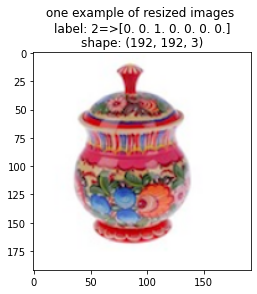

In [0]:
[x_train1,x_valid1,x_test1]=\
display_resize(x_train1,x_valid1,x_test1,
               y_valid1,cy_valid1,pixels)

In [0]:
model=premodel(pixels,1024,mhandle,7)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7175      
Total params: 3,576,903
Trainable params: 3,542,791
Non-trainable params: 34,112
_________________________________________________________________


None

In [0]:
history=model.fit(x=x_train1,y=cy_train1,batch_size=16,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,cy_valid1))

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.2218 - accuracy: 0.6031
Epoch 00001: val_loss improved from inf to 5.17903, saving model to weights.best.hdf5
25/25 [==============================] - 3s 123ms/step - loss: 1.2218 - accuracy: 0.6031 - val_loss: 5.1790 - val_accuracy: 0.3958 - lr: 0.0010
Epoch 2/50
24/25 [===========================>..] - ETA: 0s - loss: 0.6109 - accuracy: 0.8464
Epoch 00002: val_loss improved from 5.17903 to 4.80823, saving model to weights.best.hdf5
25/25 [==============================] - 2s 83ms/step - loss: 0.6131 - accuracy: 0.8454 - val_loss: 4.8082 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 3/50
24/25 [===========================>..] - ETA: 0s - loss: 0.7404 - accuracy: 0.8411
Epoch 00003: val_loss did not improve from 4.80823
25/25 [==============================] - 2s 69ms/step - loss: 0.7394 - accuracy: 0.8402 - val_loss: 9.3422 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/50
24/25 [===========================>..] - ETA: 0s -

In [0]:
model.load_weights(fw)
model.evaluate(x_test1,cy_test1)

2/2 [==============================] - 0s 51ms/step - loss: 0.5086 - accuracy: 0.8776


[0.5086020827293396, 0.8775510191917419]

In [0]:
[handle_base,pixels]=["mobilenet_v2_140_224",224]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

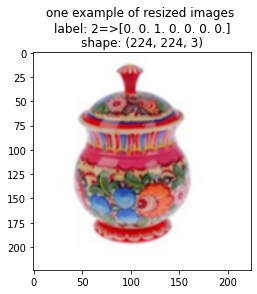

In [0]:
[x_train1,x_valid1,x_test1]=\
display_resize(x_train1,x_valid1,x_test1,
               y_valid1,cy_valid1,pixels)

In [0]:
model=premodel(pixels,1024,mhandle,7)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1792)              4363712   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1836032   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 7175      
Total params: 6,206,919
Trainable params: 6,158,983
Non-trainable params: 47,936
_________________________________________________________________


None

In [0]:
history=model.fit(x=x_train1,y=cy_train1,batch_size=16,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,cy_valid1))

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.3412 - accuracy: 0.6392
Epoch 00001: val_loss improved from inf to 13.58097, saving model to weights.best.hdf5
25/25 [==============================] - 4s 163ms/step - loss: 1.3412 - accuracy: 0.6392 - val_loss: 13.5810 - val_accuracy: 0.2083 - lr: 0.0010
Epoch 2/50
24/25 [===========================>..] - ETA: 0s - loss: 0.8802 - accuracy: 0.7812
Epoch 00002: val_loss improved from 13.58097 to 12.15238, saving model to weights.best.hdf5
25/25 [==============================] - 3s 127ms/step - loss: 0.8732 - accuracy: 0.7835 - val_loss: 12.1524 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
24/25 [===========================>..] - ETA: 0s - loss: 1.0260 - accuracy: 0.7656
Epoch 00003: val_loss did not improve from 12.15238
25/25 [==============================] - 3s 106ms/step - loss: 1.0362 - accuracy: 0.7603 - val_loss: 12.7297 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 4/50
24/25 [===========================>..] - 

In [0]:
model.load_weights(fw)
model.evaluate(x_test1,cy_test1)
del x_train1,x_valid1,x_test1,\
y_train1,y_valid1,y_test1,\
cy_train1,cy_valid1,cy_test1

2/2 [==============================] - 0s 72ms/step - loss: 0.2549 - accuracy: 0.9796


In [0]:
dhtml('#2')
[handle_base,pixels]=["mobilenet_v2_050_96",96]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

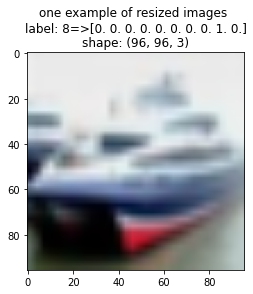

In [0]:
[x_train2,x_valid2,x_test2]=\
display_resize(x_train2,x_valid2,x_test2,
               y_valid2,cy_valid2,pixels)

In [0]:
model=premodel(pixels,512,mhandle,10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              706224    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 1,367,226
Trainable params: 1,348,682
Non-trainable params: 18,544
_________________________________________________________________


None

In [0]:
history=model.fit(x=x_train2,y=cy_train2,batch_size=64,
                  epochs=10,callbacks=cb(fw),
                  validation_data=(x_valid2,cy_valid2))

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.8008
Epoch 00001: val_loss improved from inf to 0.50922, saving model to weights.best.hdf5
782/782 [==============================] - 37s 48ms/step - loss: 0.6545 - accuracy: 0.8008 - val_loss: 0.5092 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 0.4575 - accuracy: 0.8654
Epoch 00002: val_loss did not improve from 0.50922
782/782 [==============================] - 36s 46ms/step - loss: 0.4575 - accuracy: 0.8654 - val_loss: 0.5157 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.3975 - accuracy: 0.8875
Epoch 00003: val_loss did not improve from 0.50922
782/782 [==============================] - 36s 46ms/step - loss: 0.3975 - accuracy: 0.8875 - val_loss: 0.6081 - val_accuracy: 0.8226 - lr: 0.0010
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.3619 - accurac

In [0]:
model.load_weights(fw)
model.evaluate(x_test2,cy_test2)

157/157 [==============================] - 1s 7ms/step - loss: 0.4264 - accuracy: 0.8916


[0.42640626430511475, 0.8916000127792358]

In [0]:
[handle_base,pixels]=["mobilenet_v2_075_96",96]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

In [0]:
model=premodel(pixels,1024,mhandle,10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              1382064   
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 2,704,058
Trainable params: 2,677,418
Non-trainable params: 26,640
_________________________________________________________________


None

In [0]:
history=model.fit(x=x_train2,y=cy_train2,batch_size=64,
                  epochs=10,callbacks=cb(fw),
                  validation_data=(x_valid2,cy_valid2))

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.6476 - accuracy: 0.8130
Epoch 00001: val_loss improved from inf to 0.50972, saving model to weights.best.hdf5
782/782 [==============================] - 49s 62ms/step - loss: 0.6476 - accuracy: 0.8130 - val_loss: 0.5097 - val_accuracy: 0.8474 - lr: 0.0010
Epoch 2/10
781/782 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.8742
Epoch 00002: val_loss improved from 0.50972 to 0.46002, saving model to weights.best.hdf5
782/782 [==============================] - 48s 61ms/step - loss: 0.4510 - accuracy: 0.8742 - val_loss: 0.4600 - val_accuracy: 0.8756 - lr: 0.0010
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.3905 - accuracy: 0.8959
Epoch 00003: val_loss did not improve from 0.46002
782/782 [==============================] - 47s 60ms/step - loss: 0.3905 - accuracy: 0.8960 - val_loss: 0.5170 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 4/10
781/782 [===========================

In [0]:
model.load_weights(fw)
model.evaluate(x_test2,cy_test2)
del x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2,\
cy_train2,cy_valid2,cy_test2

157/157 [==============================] - 1s 9ms/step - loss: 0.4187 - accuracy: 0.9078


In [0]:
dhtml('#3')
[handle_base,pixels]=["mobilenet_v2_050_96",96]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

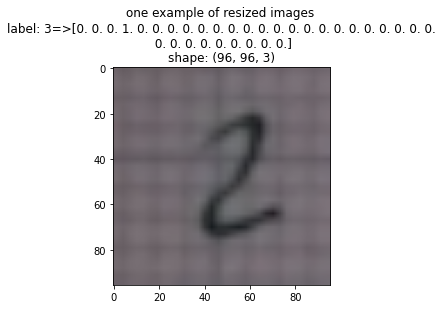

In [0]:
[x_train3,x_valid3,x_test3]=\
display_resize(x_train3,x_valid3,x_test3,
               y_valid3,cy_valid3,pixels)

In [0]:
model=premodel(pixels,512,mhandle,33)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              706224    
_________________________________________________________________
flatten_4 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 33)                16929     
Total params: 1,379,025
Trainable params: 1,360,481
Non-trainable params: 18,544
_________________________________________________________________


None

In [0]:
history=model.fit(x=x_train3,y=cy_train3,batch_size=64,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid3,cy_valid3))

Epoch 1/50
178/178 [==============================] - ETA: 0s - loss: 1.4082 - accuracy: 0.6120
Epoch 00001: val_loss improved from inf to 1.04892, saving model to weights.best.hdf5
178/178 [==============================] - 9s 52ms/step - loss: 1.4082 - accuracy: 0.6120 - val_loss: 1.0489 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 2/50
178/178 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.8827
Epoch 00002: val_loss improved from 1.04892 to 0.60953, saving model to weights.best.hdf5
178/178 [==============================] - 8s 47ms/step - loss: 0.4310 - accuracy: 0.8827 - val_loss: 0.6095 - val_accuracy: 0.8569 - lr: 0.0010
Epoch 3/50
177/178 [============================>.] - ETA: 0s - loss: 0.3054 - accuracy: 0.9177
Epoch 00003: val_loss did not improve from 0.60953
178/178 [==============================] - 8s 46ms/step - loss: 0.3054 - accuracy: 0.9176 - val_loss: 0.7138 - val_accuracy: 0.8450 - lr: 0.0010
Epoch 4/50
178/178 [==============================

In [0]:
model.load_weights(fw)
model.evaluate(x_test3,cy_test3)
del x_train3,x_valid3,x_test3,\
y_train3,y_valid3,y_test3,\
cy_train3,cy_valid3,cy_test3

45/45 [==============================] - 0s 7ms/step - loss: 0.2043 - accuracy: 0.9626


In [0]:
dhtml('#4')
[handle_base,pixels]=["mobilenet_v1_100_128",128]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

In [0]:
model=premodel(pixels,512,mhandle,10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1024)              3228864   
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 3,758,794
Trainable params: 3,736,906
Non-trainable params: 21,888
_________________________________________________________________


None

In [0]:
history=model.fit(x=x_train4,y=cy_train4,batch_size=8,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid4,cy_valid4))

Epoch 1/50
19/21 [==========================>...] - ETA: 0s - loss: 2.4764 - accuracy: 0.3487
Epoch 00001: val_loss improved from inf to 2.35595, saving model to weights.best.hdf5
21/21 [==============================] - 1s 51ms/step - loss: 2.4648 - accuracy: 0.3631 - val_loss: 2.3559 - val_accuracy: 0.4762 - lr: 0.0010
Epoch 2/50
19/21 [==========================>...] - ETA: 0s - loss: 1.2107 - accuracy: 0.7368
Epoch 00002: val_loss did not improve from 2.35595
21/21 [==============================] - 0s 20ms/step - loss: 1.1868 - accuracy: 0.7440 - val_loss: 3.1123 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 3/50
19/21 [==========================>...] - ETA: 0s - loss: 0.6404 - accuracy: 0.8355
Epoch 00003: val_loss did not improve from 2.35595
21/21 [==============================] - 0s 20ms/step - loss: 0.6166 - accuracy: 0.8393 - val_loss: 2.4927 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 4/50
19/21 [==========================>...] - ETA: 0s - loss: 0.8541 - accuracy: 0.8026
Epoch 0

In [0]:
model.load_weights(fw)
model.evaluate(x_test4,cy_test4)

1/1 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.9048


[0.49738964438438416, 0.9047619104385376]

In [0]:
[handle_base,pixels]=["mobilenet_v2_130_224",224]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

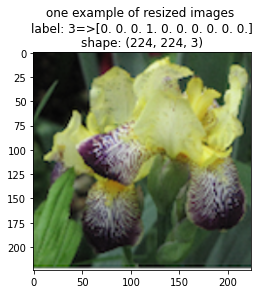

In [0]:
[x_train4,x_valid4,x_test4]=\
display_resize(x_train4,x_valid4,x_test4,
               y_valid4,cy_valid4,pixels)

In [0]:
model=premodel(pixels,512,mhandle,10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1664)              3766048   
_________________________________________________________________
flatten_5 (Flatten)          (None, 1664)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               852480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 4,623,658
Trainable params: 4,579,402
Non-trainable params: 44,256
_________________________________________________________________


None

In [0]:
history=model.fit(x=x_train4,y=cy_train4,batch_size=8,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid4,cy_valid4))

Epoch 1/50
21/21 [==============================] - ETA: 0s - loss: 2.1494 - accuracy: 0.3810
Epoch 00001: val_loss improved from inf to 4.62477, saving model to weights.best.hdf5
21/21 [==============================] - 2s 115ms/step - loss: 2.1494 - accuracy: 0.3810 - val_loss: 4.6248 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 0.9588 - accuracy: 0.7321
Epoch 00002: val_loss did not improve from 4.62477
21/21 [==============================] - 1s 62ms/step - loss: 0.9588 - accuracy: 0.7321 - val_loss: 6.2610 - val_accuracy: 0.4286 - lr: 0.0010
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 1.7622 - accuracy: 0.6012
Epoch 00003: val_loss did not improve from 4.62477
21/21 [==============================] - 1s 61ms/step - loss: 1.7622 - accuracy: 0.6012 - val_loss: 16.6044 - val_accuracy: 0.3810 - lr: 0.0010
Epoch 4/50
21/21 [==============================] - ETA: 0s - loss: 1.3135 - accuracy: 0.6845
Epoch

In [0]:
model.load_weights(fw)
model.evaluate(x_test4,cy_test4)

1/1 [==============================] - 0s 1ms/step - loss: 1.2820 - accuracy: 0.7619


[1.282037377357483, 0.761904776096344]